---
# Why Dimensionality Reduction?
---
# Why Do We Need Dimensionality Reduction?

When working with big data, we often work with data that has a lot of columns -- or a lot of dimensions. Machine learning is a great tool to use with high dimensional data because it can pick up on patterns in high dimensional spaces that would be impossible for humans to pick up on. However, challenges can arise when working with high dimensional data.

The "curse of dimensionality" refers to a phenomenon that arises when working in increasingly higher dimensional spaces - as the number of features increases, the amount of data needed to accurately generalize a model to new data grows exponentially.

Dimensionality reduction refers to any technique where we try to reduce the feature space we are working with. In general, there are two types of dimensionality reduction:

    1. Feature Selection
    2. Feature Extraction

## Feature Selection

You have already been doing feature selection! This is the process of selecting a subset of features to model on. For example, if you are building a model to predict the price of homes, you can choose to use only the top most important features in your final model and leave out the features that may not be important to the model.

But what if you don't know which features to choose?
## Feature Extraction

Feature extraction refers to techniques where you take all of your features and combine them in certain ways to reduce them into lower dimensions.

Some popular methods of feature extraction include:

    - Principal Component Analysis (PCA)
    - Linear Discriminant Analysis (LDA)


---

# Principal Component Analysis (PCA)

Learning Objectives:

    - Explain generally how PCA works.
    - State the use cases of PCA.
    - State the assumptions of PCA.

# PCA

Principal Component Analysis, abbreviated as PCA, is one of the most common techniques used for dimensionality reduction.
It is an unsupervised learning technique, meaning we do not use a target/y-vector for this technique! PCA is applied to our features and is used to reduce the dimensions of our dataset.

PCA transforms our features into a new set of variables called Principal Components, which are linear combinations of all of our original features. The algorithm relies heavily on linear algebra topics and understanding the math behind it is beyond the scope of this course, but if you are interested in learning more about how the algorithm works behind the scenes, check out the optional sections at the end of this chapter.

The Principal Components (PCs) are arranged in order of how much variability they explain: the first PC explains the most variance of our original data, while the last PC explains the least amount of variation of our original data. We choose a select number of PCs that cumulatively explain enough variance in our data yet still reduces the dimensionality of our feature space.
# Uses of PCA

PCA is useful for two main tasks:

    - Visualization: if we have high-dimensional data that would be impossible to visualize, sometimes by transforming that data into a lower-dimensional space we can visualize things like clusters.
    - Dimensionality reduction to improve model speed: we can use PCA to first reduce the dimensions of our data, then use the PCs for modeling.

# Assumptions of PCA

When doing PCA, we assume:

    - There are linear relationships between our features.
    - Importance is determined from variance, i.e. higher variance means it is more important.
    - All of our original features have the same units (if they don't, you need to scale your data!).



# PCA for Data Visualization

Learning Objectives:

    - Use PCA to visualize high dimensional data.
---
**Note**: you can watch a video walkthrough of this code at the end of this module.
# PCA for Data Visualization

One common application of PCA is to transform our data into lower-dimensional spaces in order to visualize it, a task that is impossible to do when we are working with more than 3 dimensions.
## Create Data Visualizations using PCA in Python

Let's try this in Python!
### 1. **Import Libraries.**

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

The data we will use here is from [this source](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/) and describes information about various types of iris flowers.

Let's say we want to cluster the data into different flower varieties. We might want to visually check how many clusters would be reasonable. Notice that we have several dimensions here and it would be tough to visualize this data as-is (we could only visualize a few features at a time).

We can use PCA to transform this data into less dimensions!
### 2. **Load the Dataset.**

In [2]:
# We can get the Iris dataset from the UCI datasets
url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, names = ['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 3. Split data into X and y.

In [3]:
# Save X data
X = df.drop(columns='target')
# Encode our target
le = LabelEncoder()
y = le.fit_transform(df['target'])

### 4. Scale Data.

In [4]:
# Instatiat Standard Scaler
scaler = StandardScaler()
# Fit and transform data.
scaled_df = scaler.fit_transform(X)

### 5. Apply PCA.

In [5]:
# Instatiate, fit & transform data using PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled_df)

### 6. Use Outputs of PCA to Visualize the Data.

Text(0, 0.5, 'PC2')

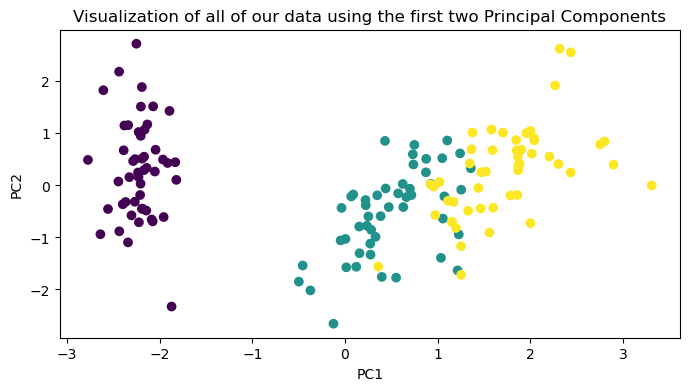

In [14]:
# Visualize the first 2 PCs
plt.figure(figsize=(8,4))
plt.scatter(pcs[:,0], pcs[:,1], c = y)
plt.title('Visualization of all of our data using the first two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

We can now clearly visualize the clusters in our dataset (which originally had 4 dimensions)!

---